In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

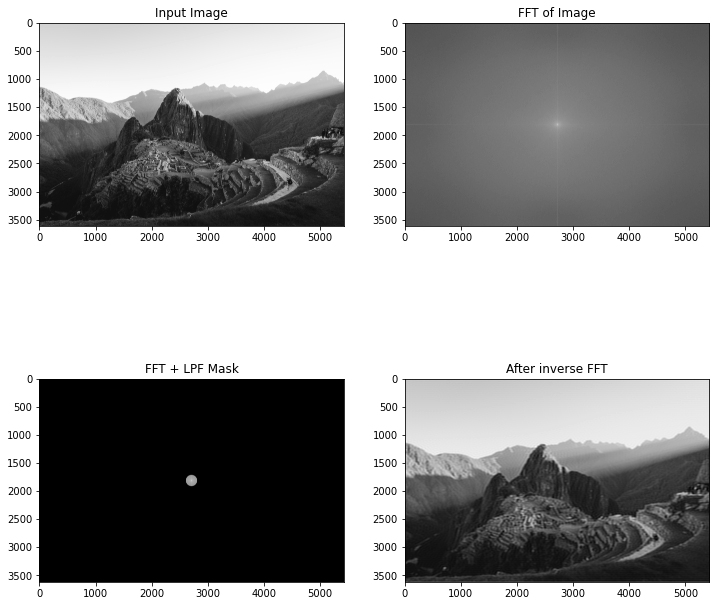

In [21]:
img = cv2.imread('scenery.jpg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])+1)

##############
# HPF mask
##############
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

mask = np.ones((rows, cols, 2), np.uint8)
r=100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x-center[0])**2 + (y-center[1])**2 >= r*r
mask[mask_area] = 0

fshift = dft_shift * mask

fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:,:,0], fshift[:,:,1])+1)

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text("Input Image")
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text("FFT of Image")
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap="gray")
ax3.title.set_text("FFT + LPF Mask")
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap="gray")
ax4.title.set_text("After inverse FFT")
plt.show()